# A/B testing Analysis

This project has two parts:  
  
Part 1. Prioritizing Hypotheses   

The task was to:
1. Use the ICE framework to prioritize hypotheses.
2. Use the RICE framework to prioritize hypotheses.
3. Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.  
  
The data given was: A file containning nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.  
  
Part 2. A/B Test Analysis  

The task was to:
1. Graph cumulative revenue by group.
2. Graph cumulative average order size by group.
3. Graph the relative difference in cumulative average order size for group B compared with group A.
4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference.
5. Plot a scatter chart of the number of orders per user.
6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
7. Plot a scatter chart of order prices.
8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
9. Find the statistical significance of the difference in conversion between the groups using the raw data.
10. Find the statistical significance of the difference in average order size between the groups using the raw data.
11. Find the statistical significance of the difference in conversion between the groups using the filtered data.
12. Find the statistical significance of the difference in average order size between the groups using the filtered data.
13. Make a decision based on the test results.  
  
Conclusions and conjectures were made along the tasks.  
  
 The data given was:  
 1. orders df (nonaggregated)
 2. visits df (aggregated)

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1. Prioritizing Hypotheses

In [2]:
# Uploading data file
hypotheses = pd.read_csv('hypotheses_us.csv', sep = ';') 

In [3]:
# seeing the data
hypotheses.T

,0,1,2,3,4,5,6,7,8
Hypothesis,Add two new channels for attracting traffic. T...,Launch your own delivery service. This will sh...,Add product recommendation blocks to the store...,Change the category structure. This will incre...,Change the background color on the main page. ...,Add a customer review page. This will increase...,Show banners with current offers and sales on ...,Add a subscription form to all the main pages....,Launch a promotion that gives users discounts ...
Reach,3,2,8,8,3,3,5,10,1
Impact,10,5,3,3,1,2,3,7,9
Confidence,8,4,7,3,1,2,8,8,9
Effort,6,10,3,8,1,3,3,5,5


In [4]:
# Calculating ICE
hypotheses['ICE'] = ((hypotheses['Impact'] * hypotheses['Confidence']) / (hypotheses['Effort'])).round(1)

In [5]:
# Printing hypotheses by ICE score
pd.options.display.max_colwidth = 210
display(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,13.3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.2
6,Show banners with current offers and sales on the main page. This will boost conversion,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.0
1,Launch your own delivery service. This will shorten delivery time,2.0
5,Add a customer review page. This will increase the number of orders,1.3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.1
4,Change the background color on the main page. This will increase user engagement,1.0


By looking at the ICE parameters the best hypothesis is the 8th: launching a promotion that gives users discounts on their birthdays.
The second and third best ideas are respectivly: addding two new channels for attracting traffic, and adding a subscription form to all the main pages.

In [6]:
# Checking the Reach colomn frequencies.
hypotheses['Reach'].value_counts().sort_index()

1     1
2     1
3     3
5     1
8     2
10    1
Name: Reach, dtype: int64

In [7]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / (hypotheses['Effort'])
display(hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


By looking at the RICE parameters the best hypothesis is the 7th: adding a subscription form to all the main pages.  
The second and third best ideas are respectivly: adding product recommendation blocks to the store's site, and adding two new channels for attracting traffic.

The main difference between ICE and RICE methods is that the Rice method includes the reach parameter and the ICE method doesn't.  
When adding reach to consideration the priority changes.  
RICE is a more data-driven and scalable prioritization method, especially when dealing with different audience sizes like in this case.  
When compering the results of both methods we can see that the efforts is the same (5) for both, the impact and confidance don't have much difference, but the reach for launchig a promotion is only one.  
After taking reach into consideration I would recommend to add a subscription form to all the main pages.

In [8]:
# Create two versions of the data: one for ICE, one for RICE
ice_df = hypotheses[['Hypothesis', 'Impact', 'Confidence', 'Effort']].copy()
ice_df['Model'] = 'ICE'

rice_df = hypotheses[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']].copy()
rice_df['Model'] = 'RICE'
rice_df

,Hypothesis,Reach,Impact,Confidence,Effort,Model
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,RICE
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,RICE
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,RICE
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,RICE
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,RICE
5,Add a customer review page. This will increase the number of orders,3,2,2,3,RICE
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,RICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,RICE


In [9]:
# Align column names
ice_df['Reach'] = pd.NA  # ICE doesn't have Reach
ice_df = ice_df[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort', 'Model']]
rice_df = rice_df[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort', 'Model']]
ice_df

,Hypothesis,Reach,Impact,Confidence,Effort,Model
0,Add two new channels for attracting traffic. This will bring 30% more users,<NA>,10,8,6,ICE
1,Launch your own delivery service. This will shorten delivery time,<NA>,5,4,10,ICE
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,<NA>,3,7,3,ICE
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,<NA>,3,3,8,ICE
4,Change the background color on the main page. This will increase user engagement,<NA>,1,1,1,ICE
5,Add a customer review page. This will increase the number of orders,<NA>,2,2,3,ICE
6,Show banners with current offers and sales on the main page. This will boost conversion,<NA>,3,8,3,ICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,<NA>,7,8,5,ICE
8,Launch a promotion that gives users discounts on their birthdays,<NA>,9,9,5,ICE


In [10]:
# Combine
combined = pd.concat([rice_df, ice_df], ignore_index=True)
combined

,Hypothesis,Reach,Impact,Confidence,Effort,Model
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,RICE
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,RICE
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,RICE
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,RICE
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,RICE
5,Add a customer review page. This will increase the number of orders,3,2,2,3,RICE
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,RICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,RICE
9,Add two new channels for attracting traffic. This will bring 30% more users,<NA>,10,8,6,ICE


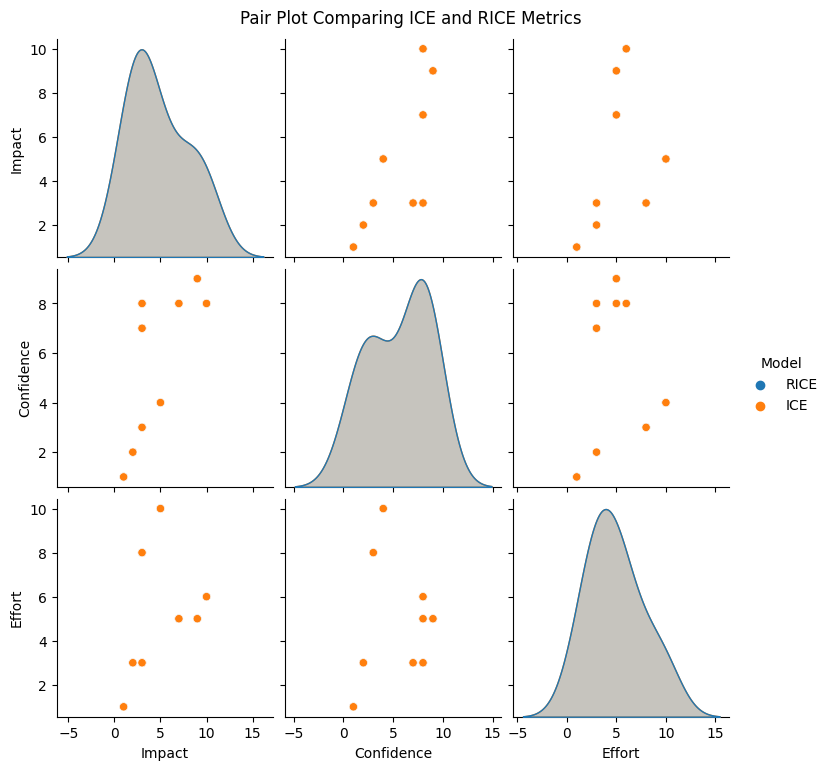

In [11]:
sns.pairplot(combined, hue='Model', diag_kind='kde')
plt.suptitle('Pair Plot Comparing ICE and RICE Metrics', y=1.02)
plt.show()

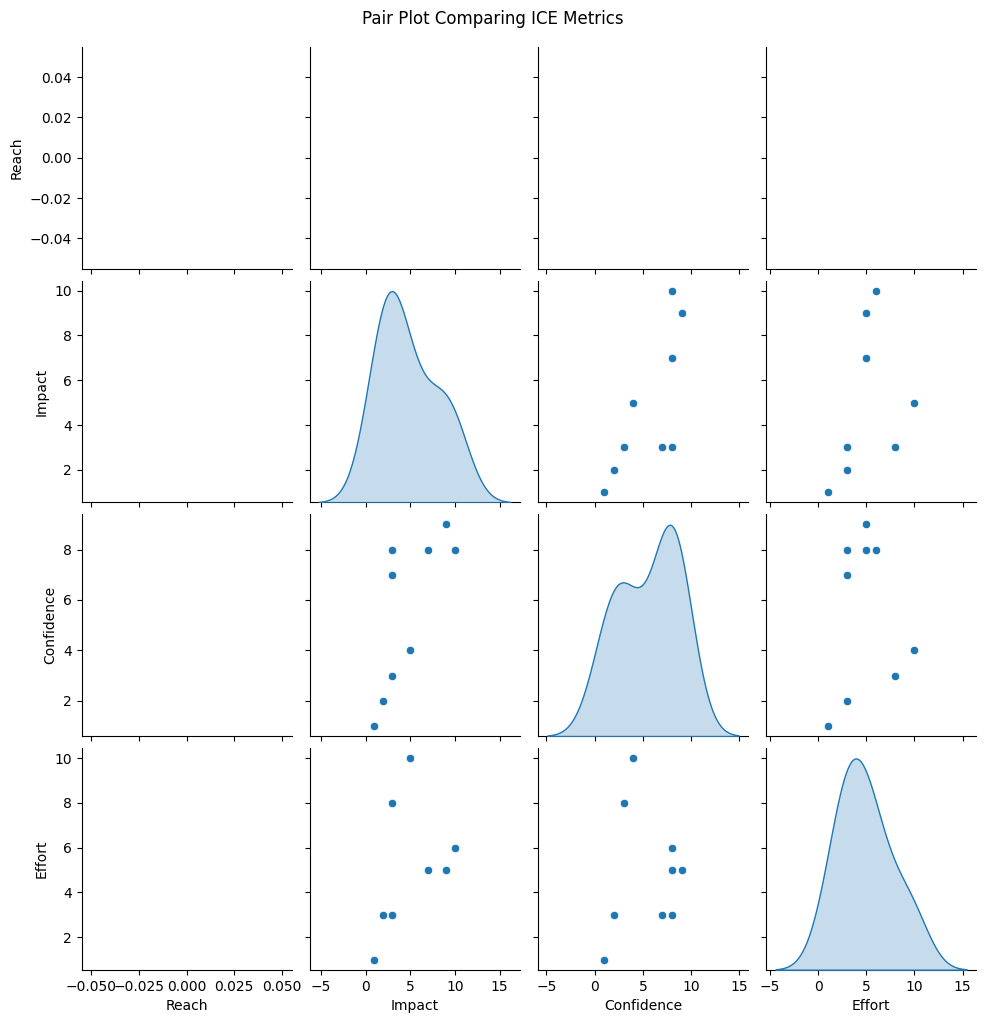

In [12]:
sns.pairplot(ice_df, diag_kind='kde')
plt.suptitle('Pair Plot Comparing ICE Metrics', y=1.02)
plt.show()

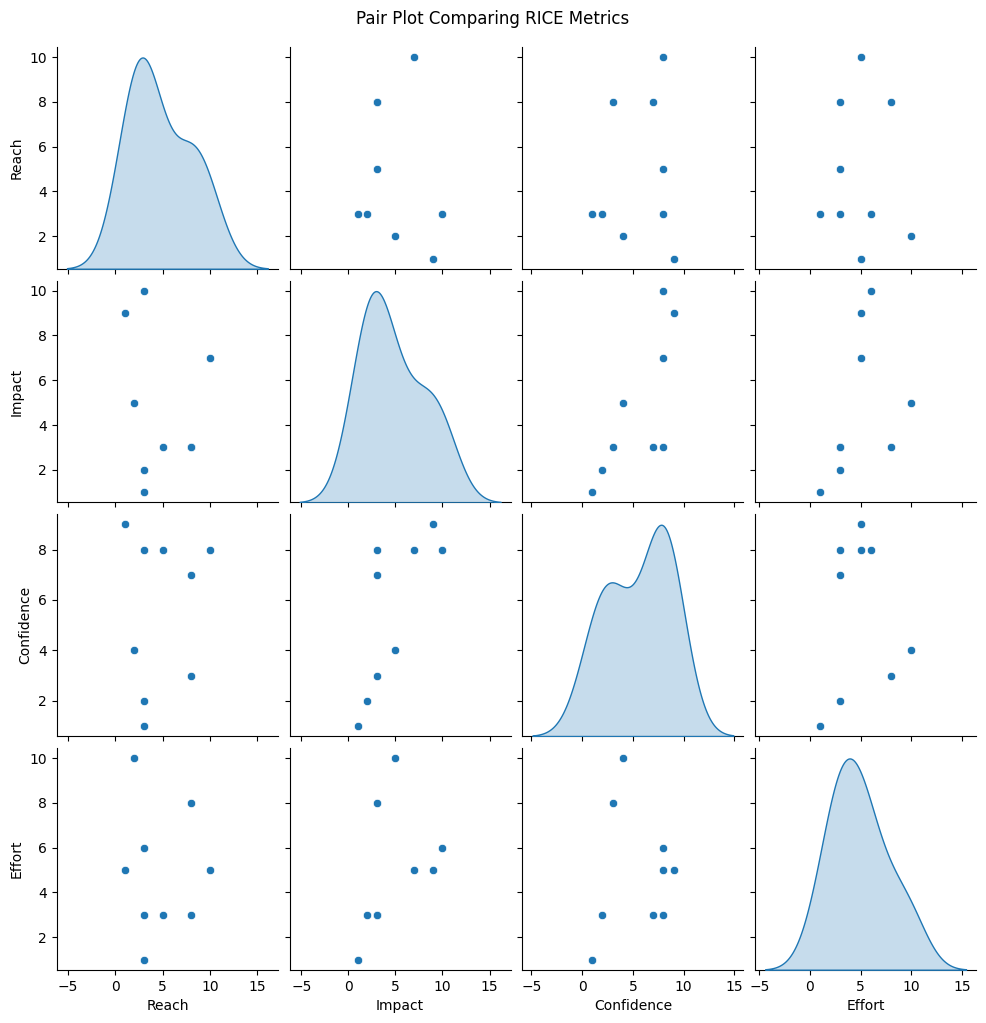

In [13]:
sns.pairplot(rice_df, diag_kind='kde')
plt.suptitle('Pair Plot Comparing RICE Metrics', y=1.02)
plt.show()

# Part 2. A/B Test Analysis

# Exploring and cleaning the data

In [14]:
# Uploading orders data file
orders = pd.read_csv('orders_us.csv', sep = ',') 

In [15]:
orders['date']=pd.to_datetime(orders['date'],dayfirst=True)

In [16]:
# Seeing the data
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [17]:
# Checking for missing values
display(orders.isnull().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [18]:
# Checking for duplicated rows
display(orders.duplicated().sum())

0

In [19]:
# Taking a look into the dataframe
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [20]:
# Checkin min and max for dates
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [21]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

There are not misssing values or duplicated rows.
The data was collected over August month.

In [22]:
# Uploading visits data file
visits = pd.read_csv('visits_us.csv', sep = ',')

In [23]:
visits['date']=pd.to_datetime(visits['date'],dayfirst=True)

In [24]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [25]:
# Checking for missing values
display(visits.isnull().sum())

date      0
group     0
visits    0
dtype: int64

In [26]:
# Checking for duplicated rows
display(visits.duplicated().sum())

0

In [27]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [28]:
# Checkin min and max for dates
visits['date'].min()

Timestamp('2019-08-01 00:00:00')

In [29]:
visits['date'].max()

Timestamp('2019-08-31 00:00:00')

There are not misssing values or duplicated rows.
The data was collected over August month.

In [30]:
# Checking for duplicate transaction IDs only
orders.duplicated(subset=['transactionId']).sum()

0

In [31]:
# Checking for visitors that are in both groups.
group_counts = orders.groupby('visitorId')['group'].nunique()
display(group_counts)

visitorId
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64

In [32]:
# Checking for visitors in more than one group
multi_group_users = group_counts[group_counts > 1]
display(multi_group_users)

visitorId
8300375       2
199603092     2
232979603     2
237748145     2
276558944     2
351125977     2
393266494     2
457167155     2
471551937     2
477780734     2
818047933     2
963407295     2
1230306981    2
1294878855    2
1316129916    2
1333886533    2
1404934699    2
1602967004    2
1614305549    2
1648269707    2
1668030113    2
1738359350    2
1801183820    2
1959144690    2
2038680547    2
2044997962    2
2378935119    2
2458001652    2
2579882178    2
2587333274    2
2600415354    2
2654030115    2
2686716486    2
2712142231    2
2716752286    2
2780786433    2
2927087541    2
2949041841    2
2954449915    2
3062433592    2
3202540741    2
3234906277    2
3656415546    2
3717692402    2
3766097110    2
3803269165    2
3891541246    2
3941795274    2
3951559397    2
3957174400    2
3963646447    2
3972127743    2
3984495233    2
4069496402    2
4120364173    2
4186807279    2
4256040402    2
4266935830    2
Name: group, dtype: int64

In [33]:
display(f"Number of users in both groups: {len(multi_group_users)}")

'Number of users in both groups: 58'

In [34]:
# Creating df with visitors in only 1 group
clean_orders = orders[np.logical_not(orders['visitorId'].isin(multi_group_users.index))]
display(clean_orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


From this point I will use clean_orders. It is not possible to use the data about visitors if they were selected to both groups.

## Cumulative revenue by group

In [35]:
# Sorting rows by date
clean_orders = clean_orders.sort_values(by='date')

In [36]:
# Creating cumulative revenue column
clean_orders['cumul_rev'] = clean_orders.groupby('group')['revenue'].cumsum()

In [37]:
clean_orders.head()

,transactionId,visitorId,date,revenue,group,cumul_rev
103,2951399376,2019355024,2019-08-01,40.2,B,40.2
148,4238948438,363280180,2019-08-01,5.6,B,45.8
147,52260954,3967698036,2019-08-01,20.2,A,20.2
97,2012801741,414545763,2019-08-01,90.5,B,136.3
145,735232225,611059232,2019-08-01,140.4,A,160.6


In [38]:
# Splitting the data by A/B groups
orders_a = clean_orders[clean_orders['group'] == 'A']
orders_a.head()

,transactionId,visitorId,date,revenue,group,cumul_rev
147,52260954,3967698036,2019-08-01,20.2,A,20.2
145,735232225,611059232,2019-08-01,140.4,A,160.6
144,365058890,611059232,2019-08-01,45.3,A,205.9
143,3433533137,678354126,2019-08-01,100.4,A,306.3
141,602399015,3967698036,2019-08-01,5.6,A,311.9


In [39]:
orders_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 147 to 1022
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  468 non-null    int64         
 1   visitorId      468 non-null    int64         
 2   date           468 non-null    datetime64[ns]
 3   revenue        468 non-null    float64       
 4   group          468 non-null    object        
 5   cumul_rev      468 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 25.6+ KB


In [40]:
orders_b = clean_orders[clean_orders['group'] == 'B']
orders_b.head()

,transactionId,visitorId,date,revenue,group,cumul_rev
103,2951399376,2019355024,2019-08-01,40.2,B,40.2
148,4238948438,363280180,2019-08-01,5.6,B,45.8
97,2012801741,414545763,2019-08-01,90.5,B,136.3
142,854120002,544963298,2019-08-01,25.9,B,162.2
140,2774185760,975516572,2019-08-01,20.3,B,182.5


In [41]:
orders_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 103 to 997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  548 non-null    int64         
 1   visitorId      548 non-null    int64         
 2   date           548 non-null    datetime64[ns]
 3   revenue        548 non-null    float64       
 4   group          548 non-null    object        
 5   cumul_rev      548 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 30.0+ KB


There is a difference of 17.09% between the groups size.  
We will have to take it into consideration while analyzing the results.  
Such significant difference can cause bias in Results.

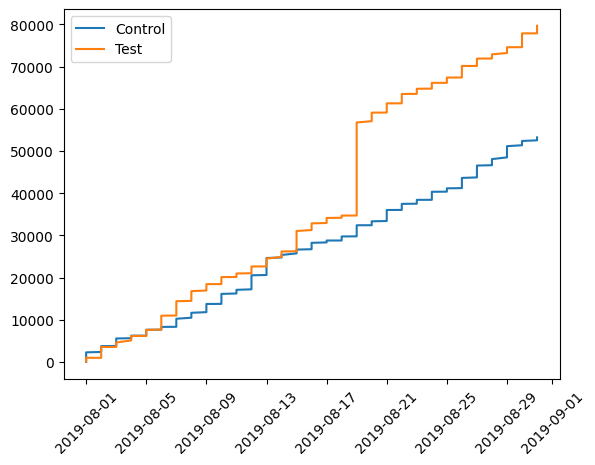

In [42]:
# Plotting cumulative revenue per day
plt.plot(orders_a['date'], orders_a['cumul_rev'], label='Control')
plt.plot(orders_b['date'], orders_b['cumul_rev'], label='Test')
plt.xticks(rotation=45)
plt.legend()

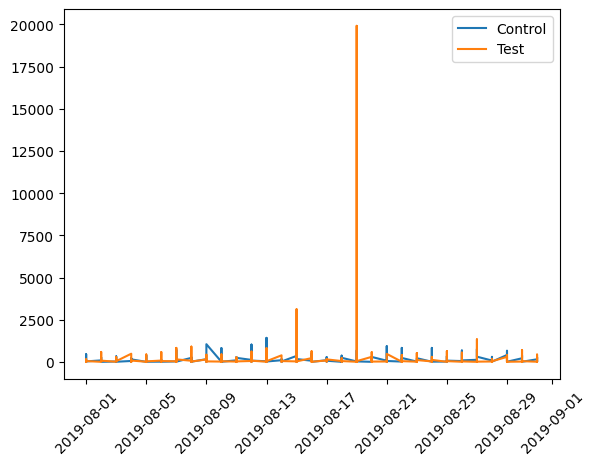

In [43]:
#Plotting general revenue per day 
plt.plot(orders_a['date'], orders_a['revenue'], label='Control')
plt.plot(orders_b['date'], orders_b['revenue'], label='Test')
plt.xticks(rotation=45)
plt.legend()

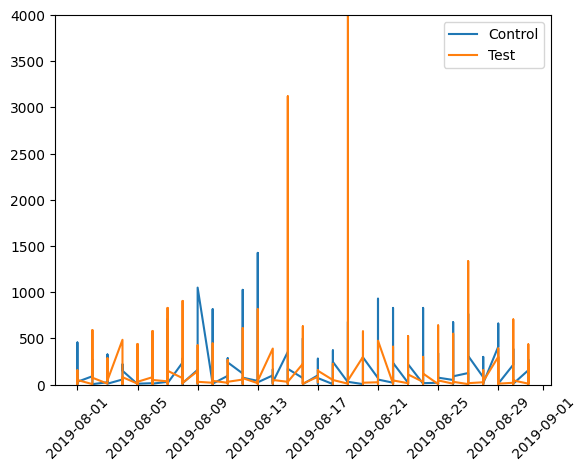

In [44]:
#plotting general revenue per day using y axis limit for better visuals
plt.plot(orders_a['date'], orders_a['revenue'], label='Control')
plt.plot(orders_b['date'], orders_b['revenue'], label='Test')
plt.ylim(0, 4000)
plt.xticks(rotation=45)
plt.legend()

We can see in both graphs that somthing happened on the 19th of August.  
the revenue on that day wad extreamly large, it might indicate the we have outliers in the data.  
It might be one costumer with a lerge buy or a bunch of visitors with small buys.  
We must understand what happened that day.
Overall, even before that spike, the test group has better performances than the control group. 

In [45]:
# Seeing what happened on the 19th
orders_b[orders_b['date'] == '19-08-2019']

,transactionId,visitorId,date,revenue,group,cumul_rev
424,2609443403,2406916810,2019-08-19,10.2,B,34694.9
423,4161654914,990904712,2019-08-19,175.1,B,34870.0
429,2436528253,1060341621,2019-08-19,20.9,B,34890.9
427,3019510679,2397843657,2019-08-19,25.5,B,34916.4
368,3268879337,2536252163,2019-08-19,310.1,B,35226.5
367,1033377712,3860669668,2019-08-19,65.4,B,35291.9
363,2096847394,4251115836,2019-08-19,40.5,B,35332.4
322,3154167297,2091902649,2019-08-19,5.8,B,35338.2
320,1652782757,2763027084,2019-08-19,25.5,B,35363.7
315,1939633950,157579733,2019-08-19,40.8,B,35404.5


We can see that one visitor (no 1920142716) is responsible for the spike with revenue of 19920, which is considerable largers than average buy.

## Cumulative average order size by group

In [46]:
# Creating a df for unique pair of group and date
datesGroups = clean_orders[['date', 'group']].drop_duplicates()
datesGroups.head()

,date,group
103,2019-08-01,B
147,2019-08-01,A
209,2019-08-02,A
210,2019-08-02,B
344,2019-08-03,A


In [47]:
# Adding to df aggrageted orders data
ordersAggregated = datesGroups.apply(
    lambda x: clean_orders[
        np.logical_and(
            clean_orders['date'] <= x['date'], clean_orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'cum_revenue']
ordersAggregated.head()

,date,group,orders,buyers,cum_revenue
147,2019-08-01,A,23,19,2266.6
103,2019-08-01,B,17,17,967.2
209,2019-08-02,A,42,36,3734.9
210,2019-08-02,B,40,39,3535.3
344,2019-08-03,A,66,60,5550.1


In [48]:
# Adding visits data to df (visits is already aggrageted)
cumulativeData = ordersAggregated.merge(
    visits, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'cum_revenue',
    'visitors',
]
cumulativeData.head()

,date,group,orders,buyers,cum_revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,619
3,2019-08-02,B,40,39,3535.3,581
4,2019-08-03,A,66,60,5550.1,507


In [49]:
# spliting df into 2 by group
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'cum_revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'cum_revenue', 'orders']]

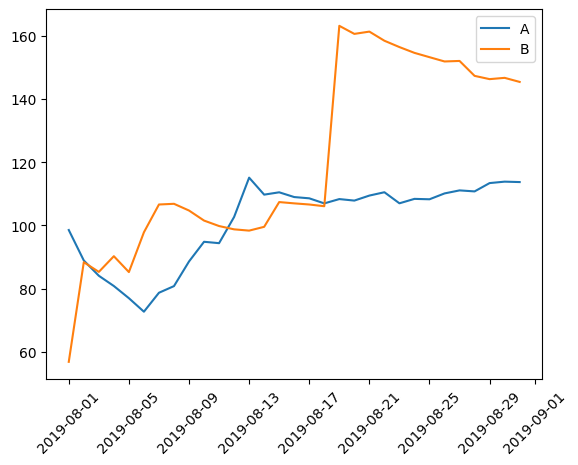

In [50]:
#Ploting cumulative average order size by group 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['cum_revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['cum_revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.legend()

The cumulative value of the groups' average purchase sizes is still fluctuating.  
We can say that by the end group B is doing consistently better, but we have to keep in mind the extreme big purchase we found earlier.
By this graph only we should end the test.

## Graph the relative difference in cumulative average order size

In [51]:
# Merging the cumulative dfs.
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,cum_revenueA,ordersA,cum_revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


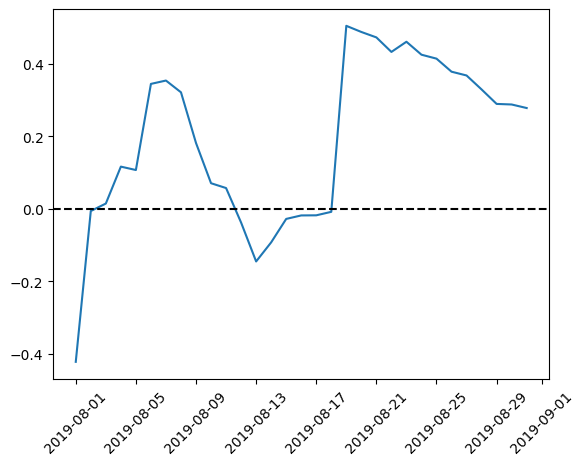

In [52]:
# Graph of the relative difference in cumulative average order size
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['cum_revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['cum_revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

This graph support the previous graph- Goup B is doing much better and the test can be ended.  

## Plot the daily conversion rates of the two groups

In [53]:
# Calculating conversion rate and edding to df
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,cum_revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,619,0.067851
3,2019-08-02,B,40,39,3535.3,581,0.068847
4,2019-08-03,A,66,60,5550.1,507,0.130178


In [54]:
# Splitting df by group
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

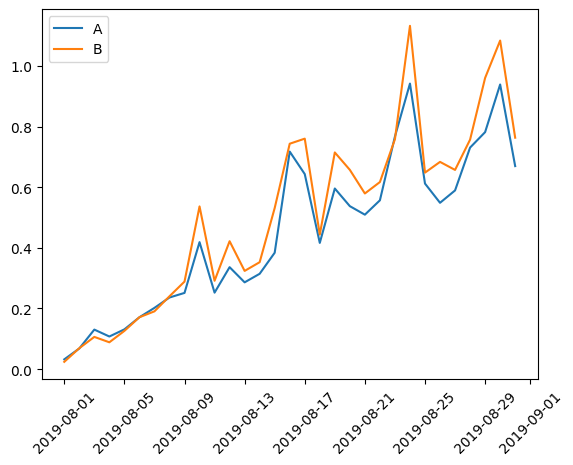

In [55]:
# Plotting the daily conversion rates
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Group B shows consistently higher conversion.  
In some points, for group B, the conversion rate is higher than 1, meaning that some visitors placed more than 1 order.

Fixed:

In [56]:
# Aggregate orders by counting unique users who placed at least one order
orders_agg = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date']<=x['date'],orders['group']==x['group'])]
    .groupby('visitorId').agg({'date':'max', 'group':'max', 'transactionId':'count', 'revenue':'sum'})
    .reset_index().agg({'date':'max', 'group':'max', 'visitorId':'count', 'transactionId':'count', 'revenue':'sum'}),
    axis=1
).sort_values(by=['date','group'])
orders_agg.head()

,date,group,visitorId,transactionId,revenue
147,2019-08-01,A,20,20,2356.8
103,2019-08-01,B,20,20,1620.0
209,2019-08-02,A,38,38,3860.3
210,2019-08-02,B,43,43,4243.8
344,2019-08-03,A,62,62,5675.5


In [57]:
# Calculate cumulative conversion rate using unique users
cumilative_data = orders_agg.merge(visits,left_on=['date','group'],right_on=['date','group'])
cumilative_data['conversion'] = cumilative_data['visitorId'] / cumilative_data['visits']
cumilative_data.head()

,date,group,visitorId,transactionId,revenue,visits,conversion
0,2019-08-01,A,20,20,2356.8,719,0.027816
1,2019-08-01,B,20,20,1620.0,713,0.028050
2,2019-08-02,A,38,38,3860.3,619,0.061389
3,2019-08-02,B,43,43,4243.8,581,0.074010
4,2019-08-03,A,62,62,5675.5,507,0.122288


In [58]:
cumilative_conv_a = cumilative_data[cumilative_data['group']=='A']
cumilative_conv_b = cumilative_data[cumilative_data['group']=='B']
cumilative_conv_a.head()

,date,group,visitorId,transactionId,revenue,visits,conversion
0,2019-08-01,A,20,20,2356.8,719,0.027816
2,2019-08-02,A,38,38,3860.3,619,0.061389
4,2019-08-03,A,62,62,5675.5,507,0.122288
6,2019-08-04,A,77,77,6822.1,717,0.107392
8,2019-08-05,A,100,100,8810.2,756,0.132275


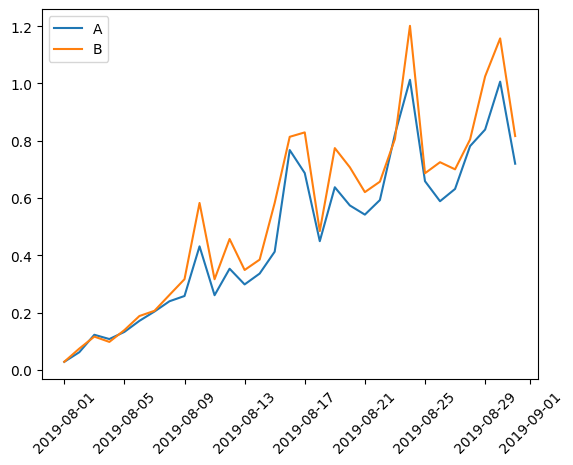

In [59]:
# Plotting the daily cumulative conversion rates
plt.plot(cumilative_conv_a['date'], cumilative_conv_a['conversion'], label='A')
plt.plot(cumilative_conv_b['date'], cumilative_conv_b['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.show()

The conclusion did not change.  
Group B shows consistently higher conversion.  
In some points, for group B, the conversion rate is higher than 1, meaning that some visitors placed more than 1 order.

## Plot a scatter chart of the number of orders per user

In [60]:
cumulativeData

,date,group,orders,buyers,cum_revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,619,0.067851
3,2019-08-02,B,40,39,3535.3,581,0.068847
4,2019-08-03,A,66,60,5550.1,507,0.130178
...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,74576.7,531,0.960452
58,2019-08-30,A,460,437,52363.7,490,0.938776
59,2019-08-30,B,531,511,77863.5,490,1.083673
60,2019-08-31,A,468,445,53212.0,699,0.669528


Text(0, 0.5, 'Number of Orders')

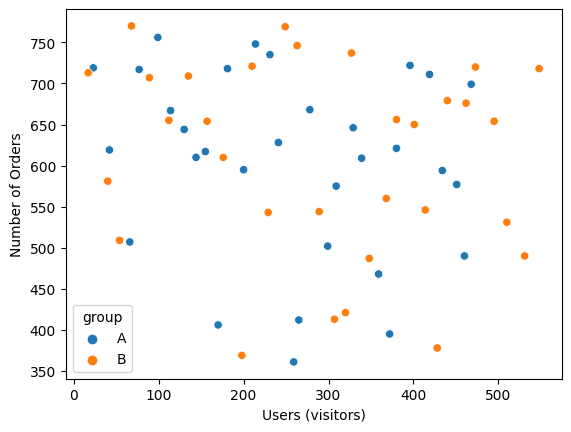

In [61]:
sns.scatterplot(data=cumulativeData, x='orders', y='visitors', hue='group')
#plt.scatter(cumulativeData['orders'], cumulativeData['visitors'])
plt.xlabel('Users (visitors)')
plt.ylabel('Number of Orders')

There is no clear association between number of users and number of orders.

## Calculate the 95th and 99th percentiles for the number of orders per user

In [62]:
cumulativeData['opu'] = cumulativeData['orders'] / cumulativeData['buyers']
cumulativeData.head()

,date,group,orders,buyers,cum_revenue,visitors,conversion,opu
0,2019-08-01,A,23,19,2266.6,719,0.031989,1.210526
1,2019-08-01,B,17,17,967.2,713,0.023843,1.000000
2,2019-08-02,A,42,36,3734.9,619,0.067851,1.166667
3,2019-08-02,B,40,39,3535.3,581,0.068847,1.025641
4,2019-08-03,A,66,60,5550.1,507,0.130178,1.100000


In [63]:
cumulativeData['opu'].describe()

count    62.000000
mean      1.048473
std       0.034490
min       1.000000
25%       1.022793
50%       1.044158
75%       1.056897
max       1.210526
Name: opu, dtype: float64

In [64]:
np.percentile(cumulativeData['opu'], [95, 99])

array([1.09557151, 1.18377193])

There are no data anomalies.  
Buyer made 1-2 purchases.

## Plot a scatter chart of order prices

In [65]:
# Adding to datesGroups df aggrageted orders data
ordersAggregated = datesGroups.apply(
    lambda x: clean_orders[
        np.logical_and(clean_orders['date'] == x['date'], clean_orders['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
147,2019-08-01,A,23,19,2266.6
103,2019-08-01,B,17,17,967.2
209,2019-08-02,A,19,18,1468.3
210,2019-08-02,B,23,22,2568.1
344,2019-08-03,A,24,24,1815.2
...,...,...,...,...,...
622,2019-08-29,B,15,15,1681.2
791,2019-08-30,A,9,8,1228.9
792,2019-08-30,B,21,21,3286.8
1014,2019-08-31,A,8,8,848.3


In [66]:
# Adding average check column
ordersAggregated['avgChek'] = ordersAggregated['revenue'] / ordersAggregated['transactionId']
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue,avgChek
147,2019-08-01,A,23,19,2266.6,98.547826
103,2019-08-01,B,17,17,967.2,56.894118
209,2019-08-02,A,19,18,1468.3,77.278947
210,2019-08-02,B,23,22,2568.1,111.656522
344,2019-08-03,A,24,24,1815.2,75.633333


Text(0, 0.5, 'Average Order Size')

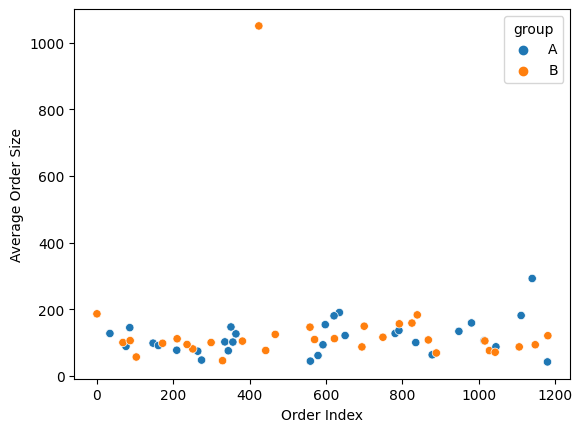

In [67]:
# Plotting a scatter chart of order prices
sns.scatterplot(data=ordersAggregated, x=ordersAggregated.index, y='avgChek', hue='group')
#plt.scatter(ordersAggregated.index, ordersAggregated['avgChek'])
plt.xlabel('Order Index')
plt.ylabel('Average Order Size')

On average most orders are bellow 200.  
There is one order over 1000 which is an outlier, and another over 200 wich might also be an  outlier.

In [68]:
ordersAggregated_filtered = ordersAggregated[ordersAggregated['avgChek'] <=200]
ordersAggregated_filtered.head()

,date,group,transactionId,visitorId,revenue,avgChek
147,2019-08-01,A,23,19,2266.6,98.547826
103,2019-08-01,B,17,17,967.2,56.894118
209,2019-08-02,A,19,18,1468.3,77.278947
210,2019-08-02,B,23,22,2568.1,111.656522
344,2019-08-03,A,24,24,1815.2,75.633333


Text(0, 0.5, 'Average Order Size')

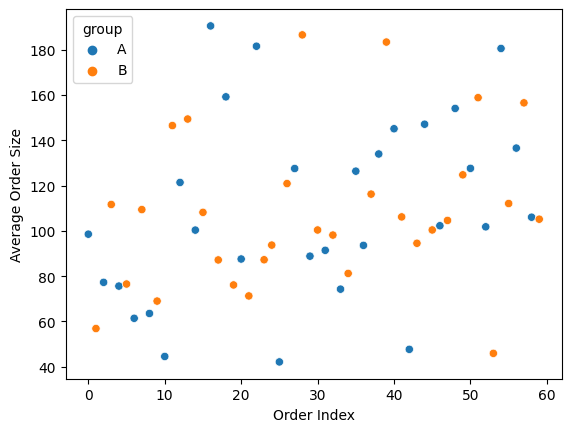

In [69]:
# Plotting a scatter chart of order prices
ordersAggregated_filtered = ordersAggregated_filtered.reset_index()
sns.scatterplot(data=ordersAggregated_filtered, x=ordersAggregated_filtered.index, y='avgChek', hue='group')
plt.xlabel('Order Index')
plt.ylabel('Average Order Size')

## Calculate the 95th and 99th percentiles of order prices

In [70]:
ordersAggregated['avgChek'].describe()

count      62.000000
mean      126.941821
std       126.959560
min        42.152941
25%        87.189474
50%       104.883578
75%       135.894583
max      1050.709524
Name: avgChek, dtype: float64

In [71]:
np.percentile(ordersAggregated['avgChek'], [95, 99])

array([186.36076923, 588.2845    ])

According to the percentiles and the graph- any order check over 200 will be consider as an outlier.  
between the 95th and 99th percentiles.

## Find the statistical significance of the difference in conversion between the groups using the raw data


    H0: There is no significant difference in conversion between the test and the control groups.
    
    H1: There is a significant difference in conversion between the test and the control groups.


In [72]:
cumulativeDataA.head()

,date,group,orders,buyers,cum_revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,619,0.067851
4,2019-08-03,A,66,60,5550.1,507,0.130178
6,2019-08-04,A,77,71,6225.6,717,0.107392
8,2019-08-05,A,99,92,7623.6,756,0.130952


In [73]:
#overall conversion control:
cumulativeDataA['buyers'].sum()/cumulativeDataA['visitors'].sum()

0.39864432109308284

In [74]:
#overall conversion test:
cumulativeDataB['buyers'].sum()/cumulativeDataB['visitors'].sum()

0.46426305772890675

The conversion rate for the control group is 39%, and for thr tests group 46%.

In [75]:
# Function for deciding which test to use.
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        display('t-test')
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        display('mannwhitneyu test')
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    display(p_value)
    if p_value<alpha:
        display('Reject H0')
    else:
        display('Fail to Reject H0')

In [76]:
testing_average(cumulativeDataA['conversion'], cumulativeDataB['conversion'], alpha=0.05)

't-test'

0.4085042383396049

'Fail to Reject H0'

The difference in conversion between the control and the test group is not sagnificant.

## Find the statistical significance of the difference in average order size between the groups using the raw data.

    
    H0: There is no significant difference in average order size between the test and the control groups.
    
    H1: There is a significant difference in average order size between the test and the control groups.


In [77]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue,avgChek
147,2019-08-01,A,23,19,2266.6,98.547826
103,2019-08-01,B,17,17,967.2,56.894118
209,2019-08-02,A,19,18,1468.3,77.278947
210,2019-08-02,B,23,22,2568.1,111.656522
344,2019-08-03,A,24,24,1815.2,75.633333


In [78]:
# Splitting df by group
ordersAggregatedA = ordersAggregated[ordersAggregated['group']=='A']
ordersAggregatedB = ordersAggregated[ordersAggregated['group']=='B']
ordersAggregatedA.head()

,date,group,transactionId,visitorId,revenue,avgChek
147,2019-08-01,A,23,19,2266.6,98.547826
209,2019-08-02,A,19,18,1468.3,77.278947
344,2019-08-03,A,24,24,1815.2,75.633333
579,2019-08-04,A,11,11,675.5,61.409091
878,2019-08-05,A,22,22,1398.0,63.545455


In [79]:
# Average order size control:
ordersAggregatedA['avgChek'].mean()

115.5124717608274

In [80]:
# Average order size test:
ordersAggregatedB['avgChek'].mean()

138.3711696835165

Average order size for the control group is 115.5, and for the test group 138.4.

In [81]:
testing_average(ordersAggregatedA['avgChek'], ordersAggregatedB['avgChek'], alpha=0.05)

'mannwhitneyu test'

0.9550914317372012

'Fail to Reject H0'

The difference in order size between the control and the test group is not sagnificant.

## Find the statistical significance of the difference in conversion between the groups using the filtered data.

    
    H0: There is no significant difference in conversion between the test and the control groups.
    
    H1: There is a significant difference in conversion between the test and the control groups.


I did not found any outliers the affect the conversion rate.

In [82]:
clean_orders_filtered = clean_orders[clean_orders['revenue'] <= 200]
clean_orders_filtered['revenue'].describe()

count    852.000000
mean      54.148122
std       46.939727
min        5.000000
25%       20.200000
50%       40.100000
75%       80.100000
max      195.800000
Name: revenue, dtype: float64

In [83]:
# Adding to datesGroups df aggrageted orders data
ordersAggregated_filtered = datesGroups.apply(
    lambda x: clean_orders_filtered[
        np.logical_and(clean_orders_filtered['date'] <= x['date'], clean_orders_filtered['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated_filtered

,date,group,transactionId,visitorId,revenue
147,2019-08-01,A,20,17,1094.7
103,2019-08-01,B,17,17,967.2
209,2019-08-02,A,37,33,2052.8
210,2019-08-02,B,35,34,1848.7
344,2019-08-03,A,59,55,3321.9
...,...,...,...,...,...
622,2019-08-29,B,435,419,23604.9
791,2019-08-30,A,382,366,20681.0
792,2019-08-30,B,451,435,24539.7
1014,2019-08-31,A,388,372,21053.8


In [84]:
ordersAggregated_filtered = ordersAggregated_filtered.merge(
    visits, left_on=['date', 'group'], right_on=['date', 'group'])
ordersAggregated_filtered.head()

,date,group,transactionId,visitorId,revenue,visits
0,2019-08-01,A,20,17,1094.7,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,37,33,2052.8,619
3,2019-08-02,B,35,34,1848.7,581
4,2019-08-03,A,59,55,3321.9,507


In [85]:
# Calculating conversion rate and edding to df
ordersAggregated_filtered['conversion'] = ordersAggregated_filtered['transactionId']/ordersAggregated_filtered['visits']
ordersAggregated_filtered.head()

,date,group,transactionId,visitorId,revenue,visits,conversion
0,2019-08-01,A,20,17,1094.7,719,0.027816
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,37,33,2052.8,619,0.059774
3,2019-08-02,B,35,34,1848.7,581,0.060241
4,2019-08-03,A,59,55,3321.9,507,0.116371


In [86]:
ordersAggregated_filteredA = ordersAggregated_filtered[ordersAggregated_filtered['group'] == 'A'] 
ordersAggregated_filteredB = ordersAggregated_filtered[ordersAggregated_filtered['group'] == 'B']
ordersAggregated_filteredA.head()

,date,group,transactionId,visitorId,revenue,visits,conversion
0,2019-08-01,A,20,17,1094.7,719,0.027816
2,2019-08-02,A,37,33,2052.8,619,0.059774
4,2019-08-03,A,59,55,3321.9,507,0.116371
6,2019-08-04,A,69,65,3777.2,717,0.096234
8,2019-08-05,A,90,85,4789.5,756,0.119048


In [87]:
#overall conversion control:
ordersAggregated_filteredA['transactionId'].sum()/ordersAggregated_filteredA['visits'].sum()

0.3596818958155423

In [88]:
#overall conversion control:
ordersAggregated_filteredB['transactionId'].sum()/ordersAggregated_filteredB['visits'].sum()

0.4088073588496511

The conversion rate for the control group is 36%, and for the tests group 41%.

In [89]:
testing_average(ordersAggregated_filteredA['conversion'], ordersAggregated_filteredB['conversion'], alpha=0.05)

't-test'

0.3872551923177199

'Fail to Reject H0'

After taking into consideration outliers and removing them from data, the difference in order size between the control and the test group is not sagnificant.

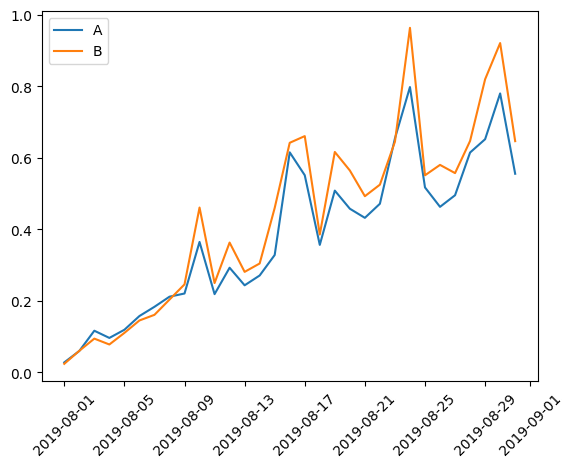

In [90]:
# Plotting the daily conversion rates
plt.plot(ordersAggregated_filteredA['date'], ordersAggregated_filteredA['conversion'], label='A')
plt.plot(ordersAggregated_filteredB['date'], ordersAggregated_filteredB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Find the statistical significance of the difference in average order size between the groups using the filtered data.

    
    H0: There is no significant difference in average order size between the test and the control groups.
    
    H1: There is a significant difference in average order size between the test and the control groups.


In [91]:
ordersAggregated_filtered['avgChk'] = ordersAggregated_filtered['revenue']/ordersAggregated_filtered['transactionId']
ordersAggregated_filtered.head()

,date,group,transactionId,visitorId,revenue,visits,conversion,avgChk
0,2019-08-01,A,20,17,1094.7,719,0.027816,54.735000
1,2019-08-01,B,17,17,967.2,713,0.023843,56.894118
2,2019-08-02,A,37,33,2052.8,619,0.059774,55.481081
3,2019-08-02,B,35,34,1848.7,581,0.060241,52.820000
4,2019-08-03,A,59,55,3321.9,507,0.116371,56.303390


In [92]:
ordersAggregated_filteredA = ordersAggregated_filtered[ordersAggregated_filtered['group'] == 'A'] 
ordersAggregated_filteredB = ordersAggregated_filtered[ordersAggregated_filtered['group'] == 'B']
ordersAggregated_filteredA.head()

,date,group,transactionId,visitorId,revenue,visits,conversion,avgChk
0,2019-08-01,A,20,17,1094.7,719,0.027816,54.735000
2,2019-08-02,A,37,33,2052.8,619,0.059774,55.481081
4,2019-08-03,A,59,55,3321.9,507,0.116371,56.303390
6,2019-08-04,A,69,65,3777.2,717,0.096234,54.742029
8,2019-08-05,A,90,85,4789.5,756,0.119048,53.216667


In [93]:
ordersAggregated_filteredA['avgChk'].mean()

53.53029657483648

In [94]:
ordersAggregated_filteredB['avgChk'].mean()

53.8867209403805

The average order size for the control group is 53.5, and for the test group 53.9.

In [95]:
testing_average(ordersAggregated_filteredA['avgChk'], ordersAggregated_filteredB['avgChk'], alpha=0.05)

't-test'

0.29450688464517105

'Fail to Reject H0'

The difference in order size between the control and the test group is not sagnificant.

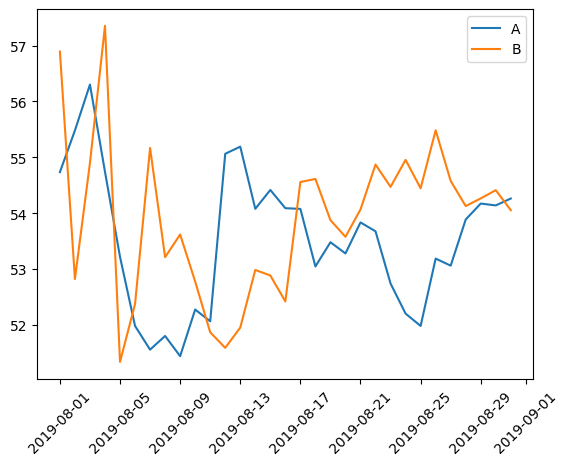

In [96]:
#Ploting cumulative average order size by group 
plt.plot(ordersAggregated_filteredA['date'], ordersAggregated_filteredA['avgChk'], label='A')
plt.plot(ordersAggregated_filteredB['date'], ordersAggregated_filteredB['avgChk'], label='B')
plt.xticks(rotation=45)
plt.legend()

In [97]:
# Merging the cumulative dfs.
mergedCumulativeRevenue_filtered = ordersAggregated_filteredA.merge(ordersAggregated_filteredB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue_filtered.head()

,date,groupA,transactionIdA,visitorIdA,revenueA,visitsA,conversionA,avgChkA,groupB,transactionIdB,visitorIdB,revenueB,visitsB,conversionB,avgChkB
0,2019-08-01,A,20,17,1094.7,719,0.027816,54.735000,B,17,17,967.2,713,0.023843,56.894118
1,2019-08-02,A,37,33,2052.8,619,0.059774,55.481081,B,35,34,1848.7,581,0.060241,52.820000
2,2019-08-03,A,59,55,3321.9,507,0.116371,56.303390,B,48,47,2635.2,509,0.094303,54.900000
3,2019-08-04,A,69,65,3777.2,717,0.096234,54.742029,B,60,58,3441.3,770,0.077922,57.355000
4,2019-08-05,A,90,85,4789.5,756,0.119048,53.216667,B,78,76,4004.3,707,0.110325,51.337179


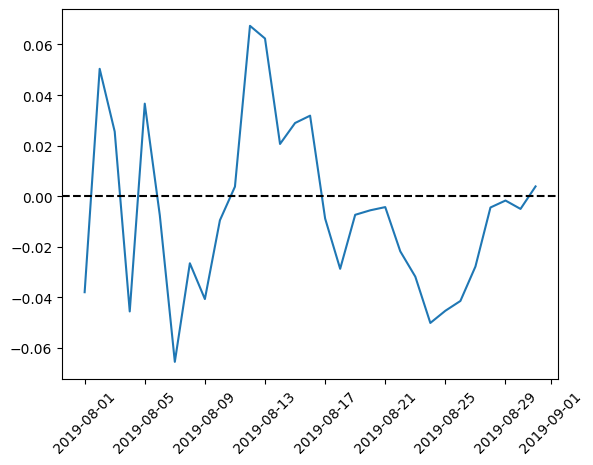

In [98]:
# Graph of the relative difference in cumulative average order size
plt.plot(mergedCumulativeRevenue_filtered['date'],
         (mergedCumulativeRevenue_filtered['avgChkA'])/(mergedCumulativeRevenue_filtered['avgChkB'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

## Make a decision based on the test results

In the unfiltered data the conversion rate was 39% for the control group, and for the tests group 46%.  
In the filtered data the conversion rate for the control group was 36%, and for the tests group 41%.  
However, the difference in conversion between the control and the test group is not sagnificant in both tests.  
In the unfiltered data the average order size for the control group is 115.5, and for the test group 138.4.  
In the filtered data the average order size for the control group is 53.5, and for the test group 53.9.  
However, the difference in conversion between the control and the test group is not sagnificant in both tests.  
📌 Interpretation:
1. Test group appears slightly better, both in conversion and average order size.  
2. Filtering reduces both conversion and order value, by removing outliers.
3. However, none of the differences are statistically significant, so we can't conclude there's a real performance difference.  
  
📌 Recommendations:
I would recommend to stop the test, and conclude that there is no difference between the groups.  
Even though Group B looks better, without significance you cannot justify switching.